<a href="https://colab.research.google.com/github/Rajat504/CLOUDYML/blob/main/Time_Series_Module10Soln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><u>Assignment:11- LSTM for Time Series Forecasting</center></h1></u>

Hello everyone!! Welcome to the Assignment no. 11 of Time Series module.

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS0uPMpTQw9tK8zZ-0bLMmllkxoZT1jtvWzXQ&usqp=CAU)

In this assignment you will be learning about implementing time series forecasting using LSTM neural networks.

<h2><u>Table of Contents:</h2></u>

1. Overview of LSTMs<br>
2. LSTM for Time Series forecasting

<h1><u>Overview of LSTMs</h1></u>

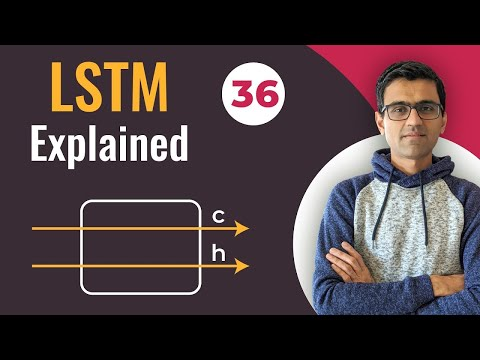

In [ ]:
###Refer Video
from IPython.display import YouTubeVideo
YouTubeVideo('LfnrRPFhkuY', width=700, height=400)

<h3><u>A look into Recurrent Neural Networks (RNN)</h3></u>

Consider sequential data, which can be found in the stock market for a specific stock. A simple machine learning model or an Artificial Neural Network can learn to anticipate stock prices based on a variety of factors such as the stock's volume, opening value, and so on. While these characteristics influence the stock's price, it is also influenced by the stock's prior day's value. In reality, for a trader, the previous days' values (or the trend) are a crucial deciding factor in making predictions.
All test instances are considered independent in traditional feed-forward neural networks. That is, when training the model for a specific day, the stock prices from the prior days are ignored.

Recurrent Neural Networks are used to achieve this time dependency. The following is an example of an RNN:

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/12/05231650/rnn-neuron-196x300.png)

This may appear frightening at first glance, however once unfurled, it appears to be much easier:

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/12/06022525/bptt-768x313.png)

Every prediction at time t (h t) is based on all prior predictions and the data gathered from them.

RNNs can help us with sequence handling to a degree, but not completely.

<h3><u>Limitations of RNNs</h3></u>

RNN only remembers things for short periods of time, thus if we require the knowledge in a short period of time, it may be reproduced, but once a large number of words are fed in, it gets lost. A slightly adjusted variant of RNNs — the Long Short-Term Memory Networks – can be used to tackle this problem.


<h3><u>LSTM (Long Short-Term Memory) Networks</h3></u>

We prioritise our appointments when we plan our day's schedule, right? We know which meeting could be cancelled to accommodate a possible meeting if we need to make some space for anything vital.

An RNN, it turns out, does not. In order to add new information, it totally alters the existing data by applying a function. As a result, the entire information gets altered, i.e. there is no distinction between 'important' and 'not so important' information.

LSTMs, on the other hand, use multiplications and adds to make minor changes to the data. Information travels through a mechanism known as cell states in LSTMs. LSTMs can selectively recall or forget things in this way. There are three different dependencies on the information at a specific cell state.


We'll provide an example to illustrate this. Take, for example, projecting stock values for a specific stock. Today's stock price will be determined by:

1. The pattern that the stock has been following in the past days, which could be down or up.
2. Because many traders compare the stock's previous day price before buying it, the price on the previous day is important.
3. The things that may influence the stock price today. This could be a highly criticised new company policy, a decrease in the company's profit, or an unexpected shift in the company's top leadership.

These relationships can be applied to any problem as follows:


1. The prior state of the cell (i.e. the information that was present in the memory after the previous time step)
2. The prior state was hidden (i.e. this is the same as the output of the previous cell)
3. The current time step's input (i.e. the new information that is being fed in at that moment)

<h3><u>Architecture of LSTMs</h3></u>

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/12/10131302/13-768x295.png)

A typical LSTM network is made up of various memory blocks known as cells (the rectangles that we see in the image). The cell state and the concealed state are the two states that are passed to the following cell. The memory blocks are in charge of remembering things, and they are manipulated through three basic mechanisms known as gates. Each of these is detailed further down.

* <h4><u>Forget Gate</h4></u>
A forget gate is in charge of erasing data from the cell state. By multiplying a filter, information that is no longer required for the LSTM to understand things or that is of lesser value is removed. This is essential for the LSTM network's performance to be optimised.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/12/10131319/14.png)

h t-1 and x t are the two inputs to this gate.
x t is the input at that time step, and h t-1 is the hidden state from the previous cell or the output of the previous cell. The weight matrices are multiplied by the provided inputs, and a bias is added. This value is then subjected to the sigmoid function. The sigmoid function returns a vector with values ranging from 0 to 1, one for each cell state number. The sigmoid function is in charge of determining which data should be kept and which should be discarded. When the forget gate outputs a '0' for a specific value in the cell state, it signifies that the forget gate wants the cell state to fully forget that piece of information. A '1', on the other hand, indicates that the forget gate wishes to remember the complete piece of data. The cell state is multiplied by the sigmoid function's vector output.

* <h4><u>Input Gate</h4></u>

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/12/10131330/16.png)

The input gate is in charge of adding information to the current state of the cell. As seen in the diagram above, this information addition is a three-step procedure.

1. A sigmoid function is used to control what values should be added to the cell state. This is similar to the forget gate in that it functions as a filter for all of the data from h t-1 and x t.
2. Creating a vector containing all potential values that can be added to the cell state (as determined by h t-1 and x t). The tanh function, which returns values ranging from -1 to +1, is used to do this.
3. Multiplying the value of the regulatory filter (the sigmoid gate) by the produced vector (the tanh function), then adding this beneficial information to the cell state via addition.

* <h4><u>Output Gate</h4></u>

The output gate is responsible for picking valuable information from the current cell state and displaying it as an output. Here's how it works:

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/12/10131340/18.png)

An output gate's operation can be broken down into three parts once more:

1. After applying the tanh function to the cell state, the values are scaled to the range -1 to +1, resulting in a vector.
2. Using the values of h t-1 and x t, design a filter that can control the values that must be output from the vector created previously. A sigmoid function is used once more in this filter.
3. Multiplying the value of this regulatory filter by the vector formed in step 1 and sending it out as an output as well as to the next cell's concealed state.

## For in depth intuition of LSTM, refer the following blog:
#### https://colah.github.io/posts/2015-08-Understanding-LSTMs/

<h1><u>LSTM for Time Series forecasting</h1></u>

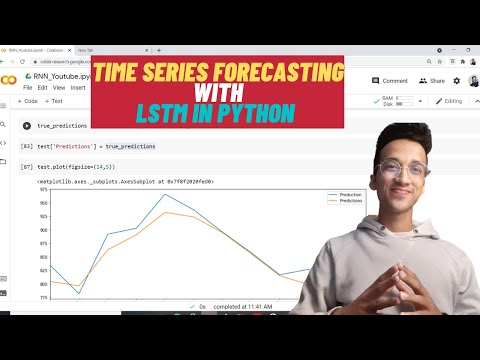

In [ ]:
###Refer Video
YouTubeVideo('S8tpSG6Q2H0', width=700, height=400)

Start by importing necessary libraries:

* matplotlib.pyplot: for visualizations
* MinMaxScalar: Transform features by scaling each feature to a given range.Refer: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
* Sequential: implementing stack of layers, Refer:https://keras.io/guides/sequential_model/
* GRU, Dense : GRU-Gated Recurrent Unit,https://keras.io/api/layers/recurrent_layers/gru/. Dense:  densely-connected NN layer. https://keras.io/api/layers/core_layers/dense/
* LSTM: https://keras.io/api/layers/recurrent_layers/lstm/
* callbacks: an object that can perform actions at various stages of training, refer:https://keras.io/api/callbacks/
* optimizers: https://keras.io/api/optimizers/ ; https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-deep-learning-optimizers/
* pandas: for storing an d manipulating data
* numpy: for array and matrix operations
* tensorflow: for implementing tensor computations and deep neural networks.

In [ ]:
#Import above mentioned libraries
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers
import pandas as pd
import numpy





The dataset used in the project is present in the google drive. So the drive has to be first mounted to use the dataset. For that use the drive library from google.colab and then mount the drive using mount function.

In [ ]:
# import drive from google.colab
import google.colab.drive as drive

# mount the drive
drive.mount('/content/drive')


ValueError: mount failed

Ahead read the dataset using read_csv method. Download the dataset from the given link and upload it in your drive. https://drive.google.com/file/d/1mZtD_Xs8QobRXLVIyVGSI2TY35b9H7ho/view?usp=sharing. <br>keep index column as Month column when reading the csv. The dataset contains two columns,Month and Passengers. Plot the dataset using matplotlib.pyplot

         Passengers
Month              
1949-01       112.0
1949-02       118.0
1949-03       132.0
1949-04       129.0
1949-05       121.0


<Axes: xlabel='Month'>

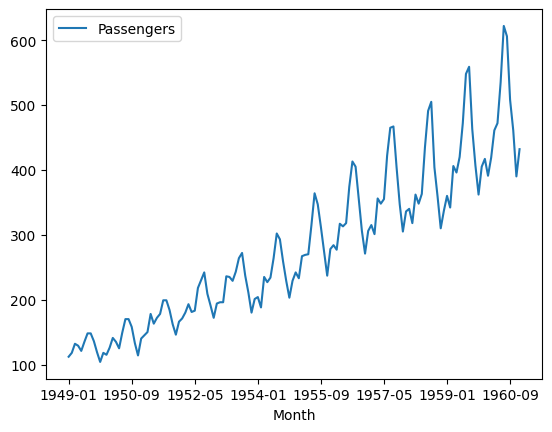

In [ ]:
#get dataset path
path = '/content/international-airline-passengers.csv'

#read the dataset
df=pd.read_csv(path,index_col='Month')

#print first 5 rows
print(pd.read_csv(path,index_col='Month').head())

#plot the dataset
df.plot()


In the next code cell, multiply the Passengers column by 1000 as the values denote number of passengers in 1000's. Set the index as 'Month' using df.index.names. Apply sort_index to the dataset.

In [ ]:
#multiply Passengers by 1000
df.Passengers=df.Passengers*1000

#set index to Month
df.index.names=['Month']

#sort the dataset based on index
df.sort_index(inplace=True)

#print total rows i.e. length of dataset
print(len(df))

#print first 5 rows
print(df.head())


146
         Passengers
Month              
1949-01    112000.0
1949-02    118000.0
1949-03    132000.0
1949-04    129000.0
1949-05    121000.0


Next, describe the data using describe function.

In [ ]:
#describe the data
df.describe()



,Passengers
count,144.000000
mean,280298.611111
std,119966.316943
min,104000.000000
25%,180000.000000
50%,265500.000000
75%,360500.000000
max,622000.000000


From the above description, the count,mean,minimum value,maximum value,etc can be seen.<br>
<br>
Plot the dataset

<Axes: xlabel='Month'>

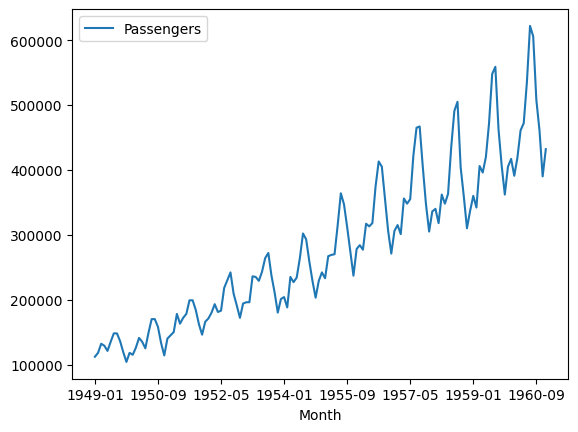

In [ ]:
#plot the data
df.plot()


Check whether the data contains any null values or not uisng isnull() and sum() functions.

In [ ]:
#check for null values
df.isnull().sum()



,0
Passengers,2


There are 2 null values in the Passengers column. As the number is small, it is okay to drop the rows with null values.

In [ ]:
#drop the rows with null values
df.dropna(inplace=True)


Now again check the null values.

In [ ]:
#check null values
df.isnull().sum()


,0
Passengers,0


Hoorayyy!! all the null values are eliminated.<br><br>

Next,plot a histogram to check the concentration of values. Refer:https://www.investopedia.com/terms/h/histogram.asp#:~:text=A%20histogram%20is%20a%20graphical,into%20logical%20ranges%20or%20bins.
Use the hist function to do so. https://www.geeksforgeeks.org/pandas-dataframe-hist-function-in-python/

array([[<Axes: title={'center': 'Passengers'}>]], dtype=object)

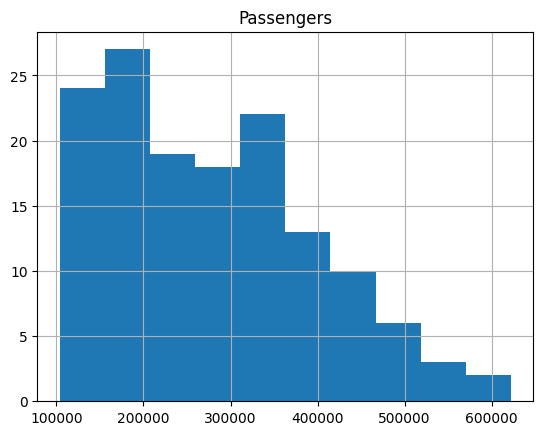

In [ ]:
#plot histogram
df.hist()


Hence we can observethat maximum number of values are present between 100000 and 200000 and minimum are present around 600000.

<br>

Next print the minimum and maximum value from the dataset to undersatnd the range of the dataset. Use the numpy.min and numpy.max methods to do so.


In [ ]:
#print minimum value
print(numpy.min(df))

#print maximum value
print(numpy.max(df))


104000.0
622000.0


Convert the dataset into datatype 'float32' using astype function. Refer: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html

In [ ]:
#convert datatype
df=df.astype('float32')


Next, we are going to apply MinMaxScaler to scale the range of dataset to 0,1. Refer: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [ ]:
#apply minmaxscalar
scaler=MinMaxScaler(feature_range=(0,1))

#apply fit_transform
scaled=scaler.fit_transform(df)


Now check the minimum and maximum value after scaling the data.

In [ ]:
#print minimum value of scaled data
print(numpy.min(scaled))

#print maximum value of scaled data
print(numpy.max(scaled))


0.0
1.0


Hence, the values in the dataset have been scaled in the range 0 to 1.

In [ ]:
#print first 10 values of scaled data
print(scaled[0:10])


[[0.01544401]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984557]
 [0.08494207]
 [0.08494207]
 [0.06177607]
 [0.02895753]]


In the next part, you need to divide the data into training and testing data. Use 70% data for training and rest for testing. Get the train size by multiplying length of scale data with 0.70. Get the test size by subtracting train size from length of scaled data. Get the train and test data by indexing the scaled data.

In [ ]:
#get train size,int(len(scaled) * 0.70)
train_size=int(len(scaled) * 0.70)

#get test size,len(scaled) - train_size
test_size=len(scaled) - train_size

#get train and test data
#train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]

#print the length of train and test data
print(len(train))
print(len(test))


100
44


Now you need to define a function that will divide the training and testing data into small pieces based on look back. It will extract the X values in given range and its corresponding y value.

In [ ]:
#define create_dataset function taking two parameters,dataset and look_back(default=1)
def create_dataset(dataset, look_back=1):
    #initialize two lists,dataX and dataY
    dataX, dataY = [], []
    #iterate through range of len(dataset)-look_back-1
    for i in range(len(dataset)-look_back-1):
        #print the length of dataset and look_back
        # This block and the following lines need to be indented
        print(len(dataset))
        print(look_back)

        #initialize two lists,dataX and dataY
        dataX, dataY = [], []

        #iterate through range of len(dataset)-look_back-1
        # The rest of the code within this for loop needs to be indented as well
        # ... (the rest of the original code with corrected indentation) ...

In [ ]:
#define create_dataset function taking two parameters,dataset and look_back(default=1)
def create_dataset(dataset, look_back=1):
    #initialize two lists,dataX and dataY
    dataX, dataY = [], []
    #iterate through range of len(dataset)-look_back-1
    for i in range(len(dataset)-look_back-1):
        #print the length of dataset and look_back
        # This block and the following lines need to be indented
        #print(len(dataset)) #commented out for brevity
        #print(look_back)    #commented out for brevity
        #extract values between i and i+look_back
        #a = dataset[i:(i+look_back), 0]
        a = dataset[i:(i+look_back), 0]
        #append a in dataX
        dataX.append(a)
        #print(i)          #commented out for brevity
        #print i and i+look_back
        #print(i+look_back) #commented out for brevity
        #print(a)           #commented out for brevity
        #print('Y {}'.format(i + look_back)) #commented out for brevity
        #append dataset[i + look_back, 0] in dataY
        dataY.append(dataset[i + look_back, 0])
        #print extracted y value
        #print(dataset[i + look_back, 0]) #commented out for brevity
        #print(dataX)        #commented out for brevity
        #print(dataY)        #commented out for brevity
        #dataset[i + look_back, 0]
    #return array form of dataX and dataY
    return numpy.array(dataX), numpy.array(dataY)

Next apply this function to train and test data,keep look_back as 1. Store the returned arrays in X_train,y_train and X_test,y_test respectively.

In [ ]:
#set look_back to 1
look_back = 1

#apply function to train data
trainX, trainY = create_dataset(train, look_back)

#apply function to test data
testX, testY = create_dataset(test, look_back)


Reshape the X_train and X_test data into dimensions as number of rows,number of columns in the data. Use the shape method to find it.

In [ ]:
#reshape X_train, np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))

#reshape X_test, np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

#print shape of reshaped X_train
print(trainX.shape)

#print shape of reshaped X_test
print(testX.shape)


(98, 1, 1)
(42, 1, 1)


Hence the shape of the data has been changed.<br><br>
Its time to build the model. Create the sequential model and add a single lstm and dense layer. Use 4 units in LSTM layer and 1 in dense layer. Compile the model using mean squared error as loss function and adam optimizer. Fit the model by passing X_train and y_train with 100 epochs.

In [ ]:
from tensorflow.keras.layers import LSTM

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Sequential

batch_size = 1
look_back = 1


model = Sequential([
    Input(batch_shape=(batch_size, look_back, 1)),  # Fixed batch size
    LSTM(4, stateful=True),  # Stateful LSTM
    Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

for epoch in range(100):
    model.fit(
        trainX,
        trainY,
        epochs=1,
        batch_size=batch_size,
        verbose=2,
        shuffle=False
    )

    model.layers[0].reset_states()  # Access LSTM layer directly

98/98 - 2s - 19ms/step - loss: 0.0036
98/98 - 0s - 2ms/step - loss: 0.0053
98/98 - 0s - 2ms/step - loss: 0.0040
98/98 - 0s - 2ms/step - loss: 0.0035
98/98 - 0s - 3ms/step - loss: 0.0034
98/98 - 0s - 3ms/step - loss: 0.0034
98/98 - 0s - 3ms/step - loss: 0.0034
98/98 - 0s - 3ms/step - loss: 0.0033
98/98 - 0s - 3ms/step - loss: 0.0033
98/98 - 0s - 3ms/step - loss: 0.0033
98/98 - 0s - 2ms/step - loss: 0.0032
98/98 - 0s - 2ms/step - loss: 0.0032
98/98 - 0s - 2ms/step - loss: 0.0032
98/98 - 0s - 2ms/step - loss: 0.0031
98/98 - 0s - 2ms/step - loss: 0.0031
98/98 - 0s - 2ms/step - loss: 0.0031
98/98 - 0s - 2ms/step - loss: 0.0030
98/98 - 0s - 2ms/step - loss: 0.0030
98/98 - 0s - 2ms/step - loss: 0.0030
98/98 - 0s - 2ms/step - loss: 0.0029
98/98 - 0s - 2ms/step - loss: 0.0029
98/98 - 0s - 2ms/step - loss: 0.0029
98/98 - 0s - 2ms/step - loss: 0.0028
98/98 - 0s - 2ms/step - loss: 0.0028
98/98 - 0s - 2ms/step - loss: 0.0028
98/98 - 0s - 2ms/step - loss: 0.0028
98/98 - 0s - 2ms/step - loss: 0.0027


After fitting the model, it is necessary to check the performance of the model. Start by importing math and mean_squared_error. Predict X_train and X_test and inverse it using scaler.inverse_transform. Get the RMSE of train and test predictions using the math.sqrt and mean_squared_error functions.

In [ ]:
import math
from sklearn.metrics import mean_squared_error


trainPredict = model.predict(trainX, batch_size=batch_size)
testPredict = model.predict(testX, batch_size=batch_size)


model.layers[0].reset_states()  # Assuming LSTM is the first layer

# Invert predictions and actual values back to original scale
trainPredict = scaler.inverse_transform(trainPredict)
trainY_orig = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_orig = scaler.inverse_transform([testY])

# Calculate RMSE
trainScore = math.sqrt(mean_squared_error(trainY_orig[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY_orig[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Train Score: 27274.80 RMSE
Test Score: 52486.70 RMSE


Now lets plot the actual and predicted data.

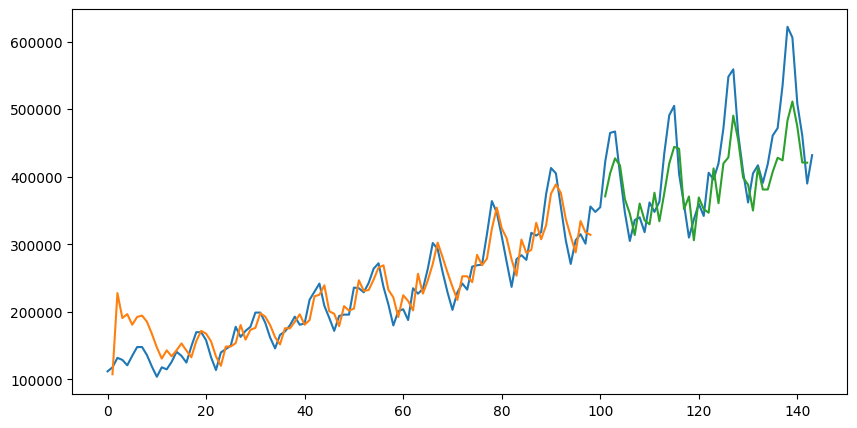

In [ ]:
#create trainPredictPlot array using empty_like
#trainPredictPlot = np.empty_like(scaled)
trainPredictPlot = numpy.empty_like(scaled)

#fill trainPredictPlot with nan values
#trainPredictPlot[:, :] = np.nan
trainPredictPlot[:, :] = numpy.nan

#fill trainPredictPlot with values from trainPredict
#trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

#create testPredictPlot array using empty_like
testPredictPlot = numpy.empty_like(scaled)

#fill testPredictPlot with nan values
testPredictPlot[:, :] = numpy.nan

#fill testPredictPlot with values from testPredict
#testPredictPlot[len(trainPredict)+(look_back*2)+1:len(scaled)-1, :] = testPredict
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(scaled)-1, :] = testPredict

#set figuresize
plt.figure(figsize=(10,5))

#plot original scaled data
plt.plot(scaler.inverse_transform(scaled))

#plot trainPredictPlot
plt.plot(trainPredictPlot)

#plot testPredictPlot
plt.plot(testPredictPlot)

#show the plot
plt.show()


Congratulations!!! You've done it.

In this assignment you learned about LSTM and using LSTM for Time Series Forecasting.

Keep practising!!<br><br>

## Do fill the feedback form given below:
## [Feedback form](https://forms.zohopublic.in/cloudyml/form/CloudyMLDeepLearningFeedbackForm/formperma/VCFbldnXAnbcgAIl0lWv2blgHdSldheO4RfktMdgK7)

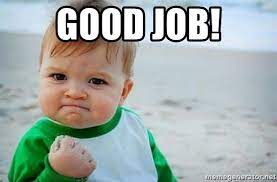

<br><br> See you then!!